In [25]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

sb.set()

# Dataset Preparation

## Merging Datasets

In [26]:
# Read the dataset 'lego-returns-kaggle.csv' into a DataFrame named df1
df1 = pd.read_csv('lego-returns-kaggle.csv')
df1.head()

,set_id,set_name,release_year,theme_id,num_parts,num_figs,retail_price,num_unique_figs,set_rating,retire_month,retire_price,pop_price,Unnamed: 12
0,60244-1,Police Helicopter Transport,2020,61,317,4,39.99,3,4.6,Oct-21,37.60,37.29,NaN
1,60248-1,Fire Helicopter Response,2020,58,93,3,17.99,0,4.4,Nov-21,22.74,22.49,NaN
2,60252-1,Construction Bulldozer,2020,56,126,2,17.99,0,4.5,Nov-21,21.00,19.74,NaN
3,60254-1,Race Boat Transporter,2020,52,239,2,24.99,0,4.6,Nov-21,32.19,35.27,NaN
4,60258-1,Tuning Workshop,2020,52,897,7,89.99,6,4.6,Nov-21,86.17,95.37,NaN


In [27]:
# Read the dataset 'sets.csv' into a DataFrame named df2
df2 = pd.read_csv('sets.csv')
df2.head()

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},16.0,NaN,10.0,0.0,NaN,NaN,NaN
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},20.0,NaN,11.0,0.0,NaN,NaN,NaN
2,077-1,Pre-School Set,1975,Duplo,Pre-school,NaN,Normal,{Not specified},0,{Not specified},21.0,NaN,10.0,0.0,NaN,0.0,NaN
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},32.0,NaN,8.0,0.0,NaN,NaN,NaN
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,{Not specified},330.0,NaN,10.0,0.0,NaN,0.0,NaN


In [28]:
# Merge datasets on 'set_id'
df2.rename(columns={'Set_ID':'set_id'}, inplace = True)
merged_df = df1.merge(df2, on='set_id')
merged_df.to_csv("merged_lego_dataset.csv", index=False)
merged_df.head()

,set_id,set_name,release_year,theme_id,num_parts,num_figs,retail_price,num_unique_figs,set_rating,retire_month,...,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,60244-1,Police Helicopter Transport,2020,61,317,4,39.99,3,4.6,Oct-21,...,Box,6,Retail,317.0,4.0,925.0,0.0,49.99,4.0,19.8000
1,60248-1,Fire Helicopter Response,2020,58,93,3,17.99,0,4.4,Nov-21,...,Box,2,Retail,93.0,3.0,1137.0,2.3,29.99,1.0,9.9900
2,60252-1,Construction Bulldozer,2020,56,126,2,17.99,0,4.5,Nov-21,...,Box,4,Retail,126.0,2.0,2606.0,3.8,19.99,9.0,18.5000
3,60254-1,Race Boat Transporter,2020,52,239,2,24.99,0,4.6,Nov-21,...,Box,4,Retail,238.0,2.0,2245.0,4.0,29.99,2.0,28.0000
4,60258-1,Tuning Workshop,2020,52,897,7,89.99,6,4.6,Nov-21,...,Box,12,Retail,897.0,7.0,3111.0,4.1,99.99,11.0,73.4902


Import "merged_lego_dataset.csv"

In [29]:
legoData = pd.read_csv("merged_lego_dataset.csv")
legoData.head()

,set_id,set_name,release_year,theme_id,num_parts,num_figs,retail_price,num_unique_figs,set_rating,retire_month,...,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,60244-1,Police Helicopter Transport,2020,61,317,4,39.99,3,4.6,Oct-21,...,Box,6,Retail,317.0,4.0,925.0,0.0,49.99,4.0,19.8000
1,60248-1,Fire Helicopter Response,2020,58,93,3,17.99,0,4.4,Nov-21,...,Box,2,Retail,93.0,3.0,1137.0,2.3,29.99,1.0,9.9900
2,60252-1,Construction Bulldozer,2020,56,126,2,17.99,0,4.5,Nov-21,...,Box,4,Retail,126.0,2.0,2606.0,3.8,19.99,9.0,18.5000
3,60254-1,Race Boat Transporter,2020,52,239,2,24.99,0,4.6,Nov-21,...,Box,4,Retail,238.0,2.0,2245.0,4.0,29.99,2.0,28.0000
4,60258-1,Tuning Workshop,2020,52,897,7,89.99,6,4.6,Nov-21,...,Box,12,Retail,897.0,7.0,3111.0,4.1,99.99,11.0,73.4902


## Adding a new column for change in price

In [30]:
# Add a new column 'price_change' which is the difference between 'price_change' and 'retail_price'
legoData['price_change'] = legoData['pop_price'] - legoData['retail_price']
legoData.head()

,set_id,set_name,release_year,theme_id,num_parts,num_figs,retail_price,num_unique_figs,set_rating,retire_month,...,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price,price_change
0,60244-1,Police Helicopter Transport,2020,61,317,4,39.99,3,4.6,Oct-21,...,6,Retail,317.0,4.0,925.0,0.0,49.99,4.0,19.8000,-2.70
1,60248-1,Fire Helicopter Response,2020,58,93,3,17.99,0,4.4,Nov-21,...,2,Retail,93.0,3.0,1137.0,2.3,29.99,1.0,9.9900,4.50
2,60252-1,Construction Bulldozer,2020,56,126,2,17.99,0,4.5,Nov-21,...,4,Retail,126.0,2.0,2606.0,3.8,19.99,9.0,18.5000,1.75
3,60254-1,Race Boat Transporter,2020,52,239,2,24.99,0,4.6,Nov-21,...,4,Retail,238.0,2.0,2245.0,4.0,29.99,2.0,28.0000,10.28
4,60258-1,Tuning Workshop,2020,52,897,7,89.99,6,4.6,Nov-21,...,12,Retail,897.0,7.0,3111.0,4.1,99.99,11.0,73.4902,5.38


# Exploratory Data Analysis

## Exploring the response variable price_change

### Price Change

<AxesSubplot:xlabel='price_change', ylabel='Count'>

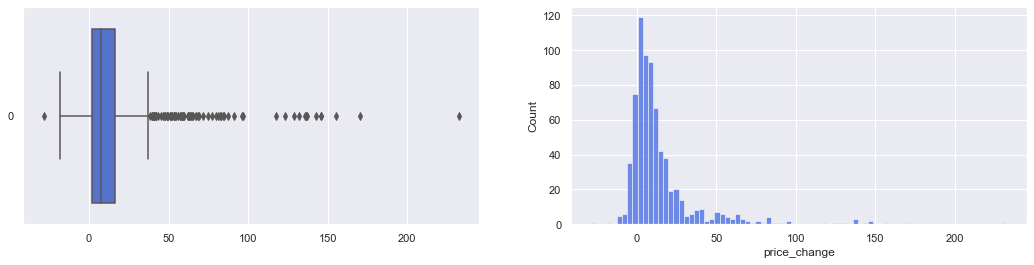

In [31]:
# Plot boxplot and histogram for change in price
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = legoData['price_change'], orient = "h", ax = axes[0], color='royalblue')
sb.histplot(data = legoData['price_change'], ax = axes[1], color='royalblue')

### Percentage Price Change

<AxesSubplot:xlabel='price_change_percentage', ylabel='Count'>

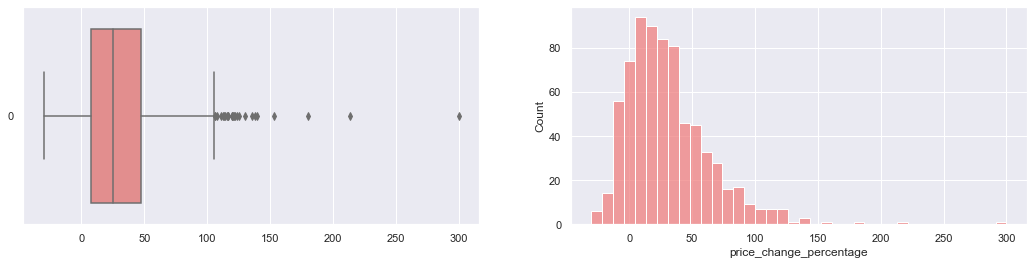

In [32]:
# Calculate percentage change in price
legoData['price_change_percentage'] = (legoData['pop_price'] - legoData['retail_price']) / legoData['retail_price'] * 100

# Plot boxplot and histogram for percentage change in price
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data=legoData['price_change_percentage'], orient="h", ax=axes[0], color='lightcoral')
sb.histplot(data=legoData['price_change_percentage'], ax=axes[1], color='lightcoral')

# Exploring Numeric predictors

In [33]:
# Extracting numerical variables from the legoData DataFrame 
numericalData = legoData[['num_parts','num_figs','retail_price','num_unique_figs']]
numericalData

,num_parts,num_figs,retail_price,num_unique_figs
0,317,4,39.99,3
1,93,3,17.99,0
2,126,2,17.99,0
3,239,2,24.99,0
4,897,7,89.99,6
...,...,...,...,...
717,310,4,34.99,1
718,363,2,34.99,1
719,282,10,24.99,4
720,558,4,49.99,3


In [34]:
numericalData.describe()

,num_parts,num_figs,retail_price,num_unique_figs
count,722.000000,722.00000,722.000000,722.000000
mean,517.495845,2.66759,46.499363,1.529086
std,615.932545,2.84608,44.507298,2.149054
min,52.000000,0.00000,10.990000,0.000000
25%,191.000000,0.00000,19.990000,0.000000
50%,333.000000,2.00000,29.990000,1.000000
75%,602.750000,4.00000,54.990000,2.000000
max,5923.000000,21.00000,399.990000,16.000000


## Summary Statistics for Numerical Factors

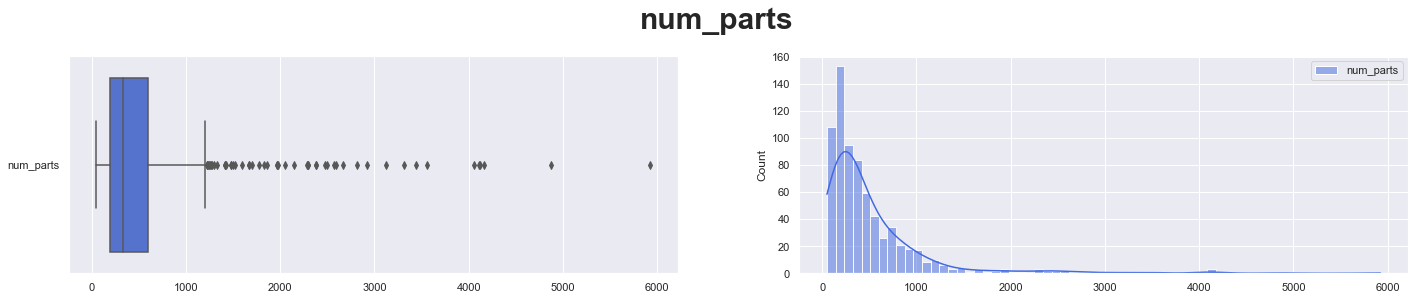

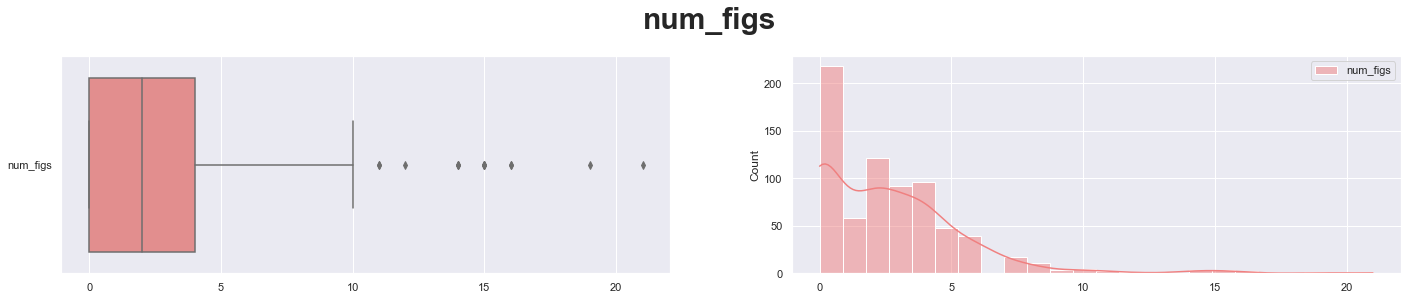

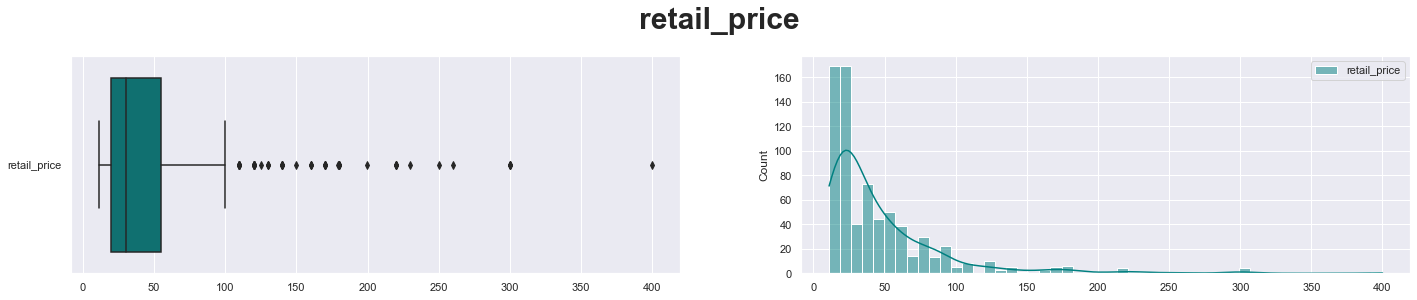

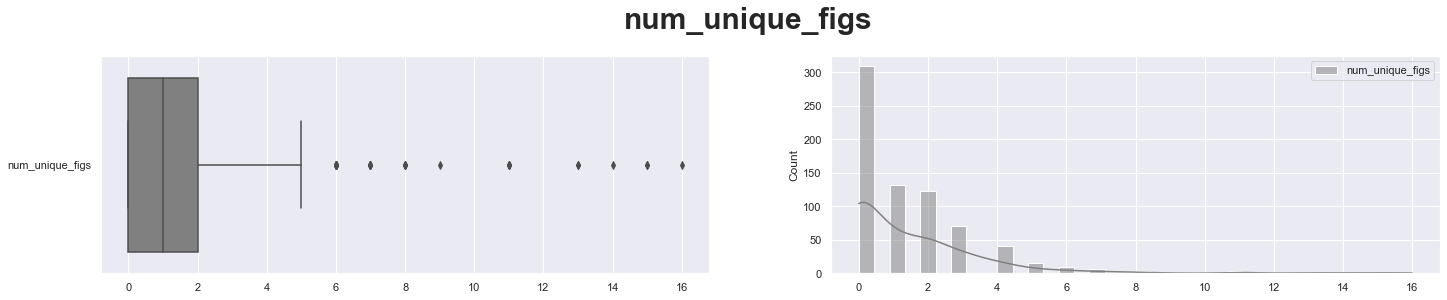

In [35]:
# Function to visualize summary statistics (boxplot and histogram) for a numerical variable
def summary_stats_vis(var, color):
    var_df = pd.DataFrame(legoData[var])
    f, axes = plt.subplots(1, 2, figsize=(24, 4))
    sb.boxplot(data=var_df, orient="h", color=color, ax=axes[0])  # Set color for boxplot
    sb.histplot(data=var_df, kde=True, ax=axes[1], palette=[color])  # Set color for histogram
    plt.suptitle(f'{var}', fontsize=30, fontweight='bold', x=0.5, y=1.05, ha='center')

# Define a list of colors for each variable
colors = ['royalblue', 'lightcoral', 'teal', 'grey']

# Visualisation of summary statistics for numerical data
for idx, var in enumerate(numericalData):
    summary_stats_vis(var, colors[idx % len(colors)])  # Use modulo to cycle through colors

## Finding Relationship between Numerical Factors and Price Change

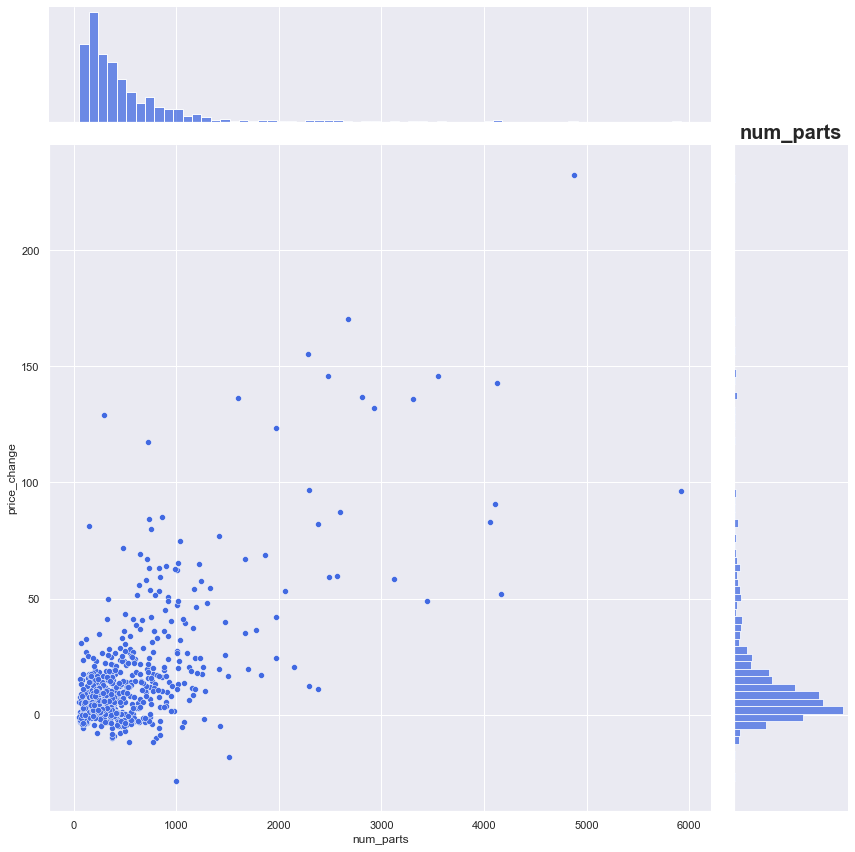

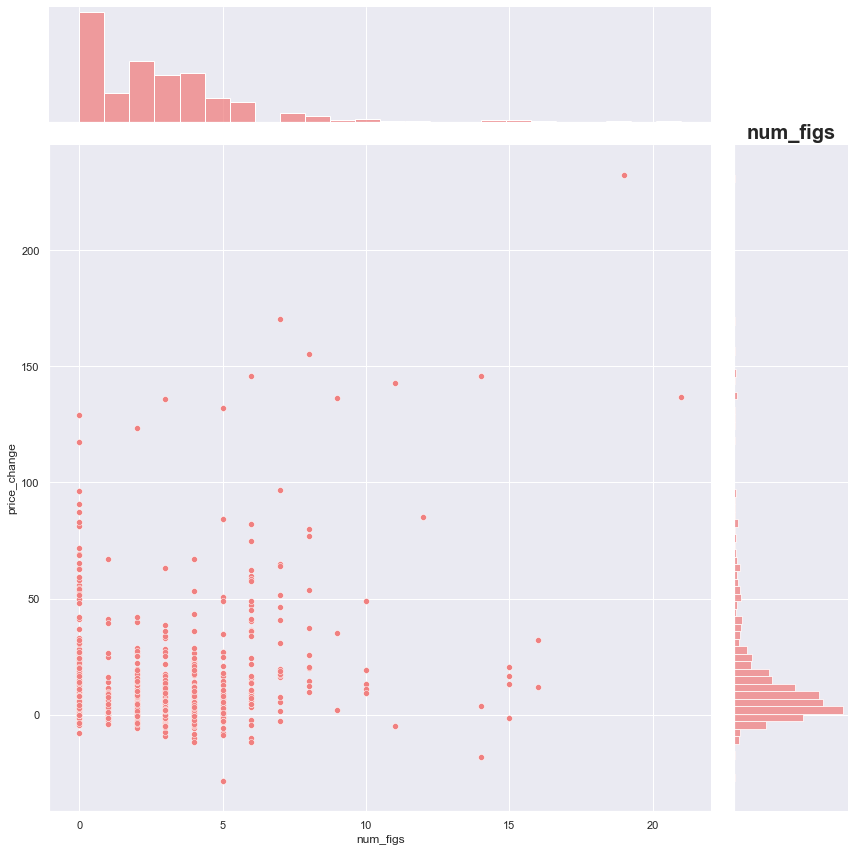

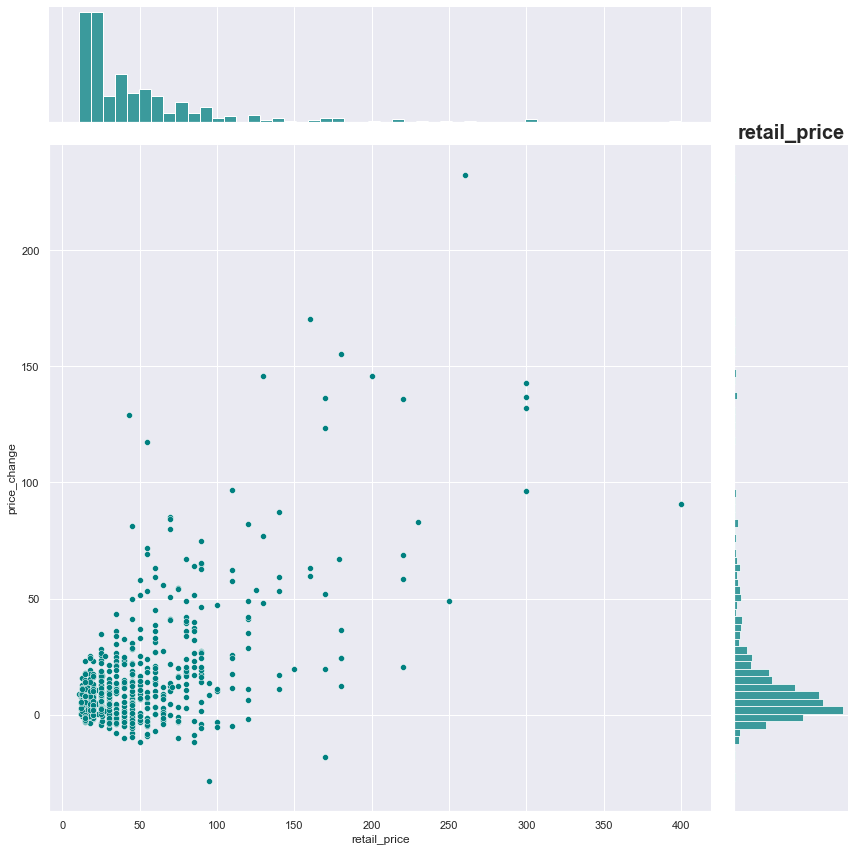

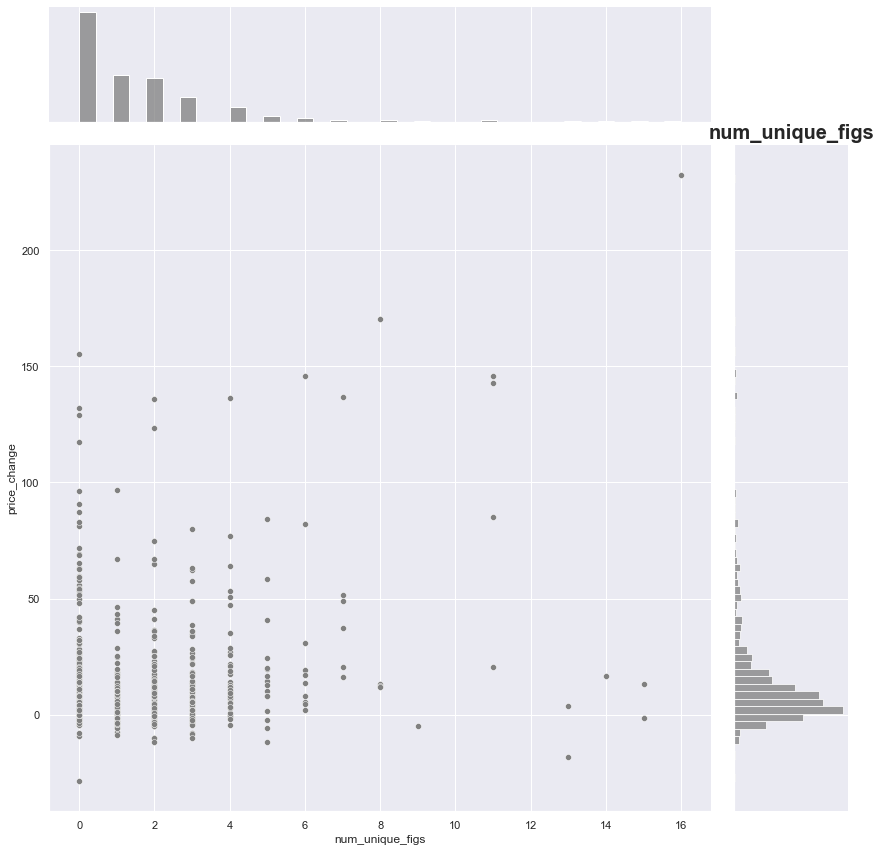

In [36]:
Price_Change = pd.DataFrame(legoData["price_change"])

# Function to create joint plots for a numerical variable and price change
def jointplot(var, color):
    var_df = pd.DataFrame(legoData[var])
    jointDF = pd.concat([Price_Change, var_df], axis=1)
    sb.jointplot(data=jointDF, x=var, y="price_change", height=12, color=color)
    plt.title(f'{var}', fontsize=20, fontweight='bold')

# Define a list of colors for each variable
colors = ['royalblue', 'lightcoral', 'teal', 'grey']

# Drawing joint plots for each numerical variable
for idx, var in enumerate(numericalData):
    jointplot(var, colors[idx % len(colors)])  # Use modulo to cycle through colors

# Exploring of Categorical Predictors

In [37]:
# Extracting categorical variables from the legoData DataFrame 
categoricalData = legoData[['theme_id','Rating','Availability']]
categoricalData

,theme_id,Rating,Availability
0,61,0.0,Retail
1,58,2.3,Retail
2,56,3.8,Retail
3,52,4.0,Retail
4,52,4.1,Retail
...,...,...,...
717,158,3.7,Retail
718,158,3.8,Retail
719,209,3.9,Retail
720,158,3.5,Retail


## Summary Statistics for Categorical Data

Text(0.5, 1.0, 'Theme ID')

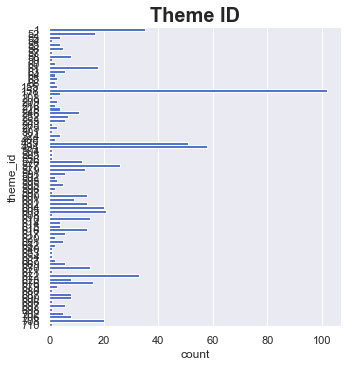

In [38]:
# Create a categorical plot showing the count of occurrences for each theme_id
sb.catplot(y='theme_id', data=legoData, kind="count", color='royalblue')
plt.title('Theme ID', fontsize=20, fontweight='bold')

Too many categories to visualise or perhaps even use, hence we decide to filter out the top 20 most common catergories and treat the rest as a generic others

Text(0.5, 1.0, 'Modified Theme ID')

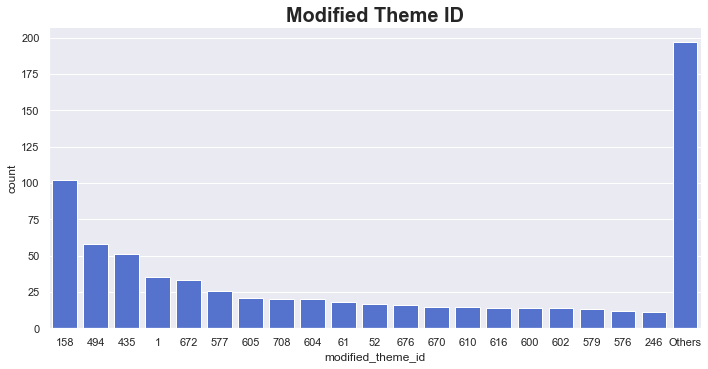

In [39]:
# Group theme_ids into top 20 and others 
N = 20
top_n_theme_ids = legoData['theme_id'].value_counts().nlargest(N).index

# Create a categorical plot showing the count of occurrences for each modified_theme_id
legoData['modified_theme_id'] = legoData['theme_id'].apply(lambda x: x if x in top_n_theme_ids else 'Others')
sb.catplot(x='modified_theme_id', kind='count', data=legoData, aspect=2, order=top_n_theme_ids.tolist() + ['Others'], color='royalblue')

plt.title('Modified Theme ID', fontsize=20, fontweight='bold')

Text(0.5, 1.05, 'Rating')

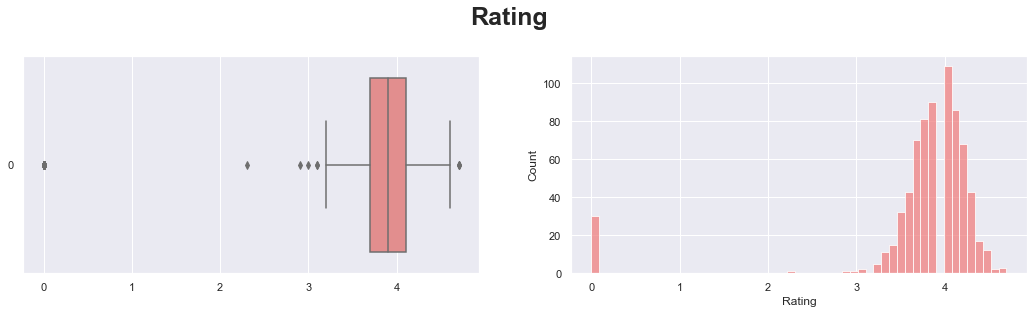

In [40]:
# Create subplots with a boxplot and histogram to visualize the distribution of 'Rating'
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data=legoData['Rating'], orient="h", ax=axes[0], color='lightcoral')
sb.histplot(data=legoData['Rating'], ax=axes[1], color='lightcoral')

plt.suptitle('Rating', fontsize=25, fontweight='bold', x=0.5, y=1.05, ha='center')

An abundance of 0 ratings could be considered outliers

Text(0.5, 1.0, 'Availability\n')

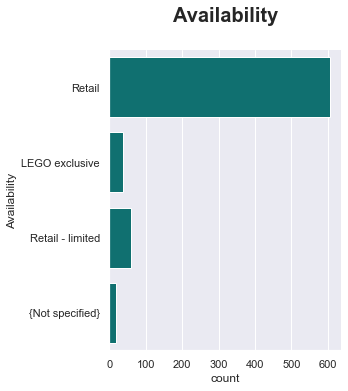

In [41]:
# Create a categorical plot showing the count of occurrences for each 'Availability' category
sb.catplot(y='Availability', data=legoData, kind="count", color='teal')
plt.title('Availability\n', fontsize=20, fontweight='bold')

## Finding Relationship between Categorical Factors and Price Change

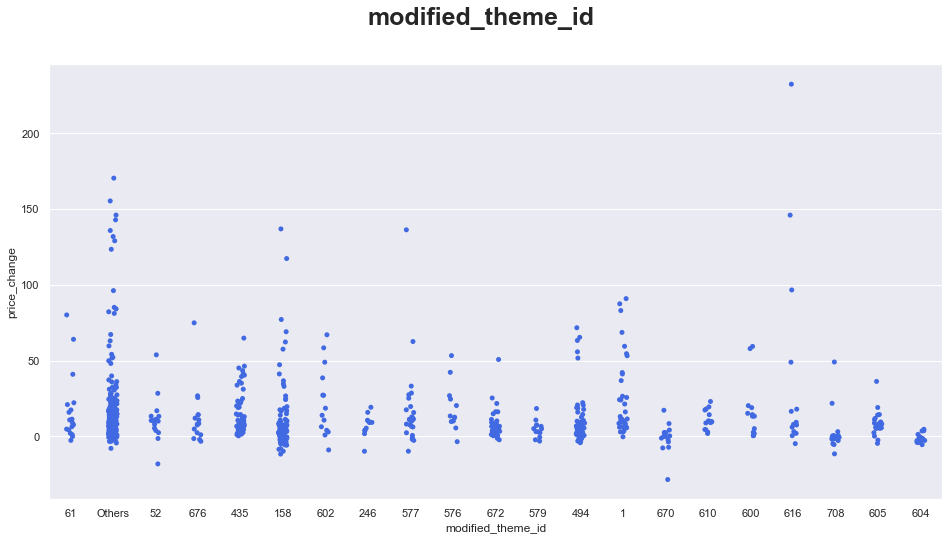

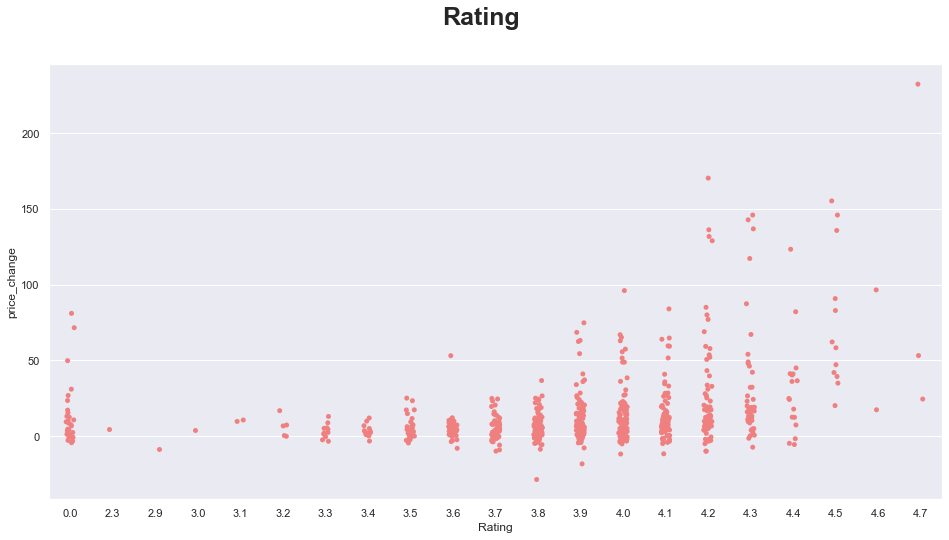

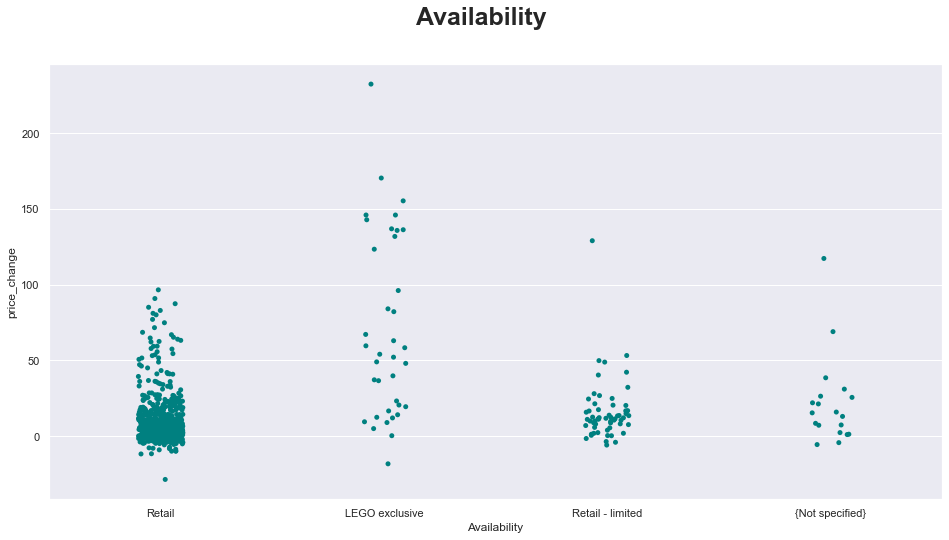

In [42]:
# Define a function to create strip plots for 'Rating' and 'Availability' against 'price_change'.
def plot_strip_plots(var, color):
    f = plt.figure(figsize=(16, 8))
    sb.stripplot(x=var, y='price_change', data=legoData, color=color)
    plt.suptitle(f'{var}', fontsize=25, fontweight='bold')
    
# Create a new categorical data list, containing 'modified_theme_id'
categoricalData_modified = ['modified_theme_id','Rating', 'Availability']

# Define colors for each variable
colors = ['royalblue', 'lightcoral', 'teal']

# Loop through each categorical variable and call the function
for idx, var in enumerate(categoricalData_modified):
    plot_strip_plots(var, colors[idx])

# Model Attempt 1 (Linear Regression)

### One Hot Encoding

In [43]:
# Since categorical data can't directly be used in linear regression, we use on hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
ohe.fit(categoricalData)
categoricalData_ohe = pd.DataFrame(ohe.transform(categoricalData).toarray(), 
                                  columns=ohe.get_feature_names_out(categoricalData.columns))

# Create a DataFrame containing the 'price_change' variable
pricechangedata =  pd.DataFrame(legoData['price_change'])

# Concatenate numericalData and one-hot encoded categoricalData
TotalData_ohe = pd.concat([numericalData, categoricalData_ohe], 
                           sort = False, axis = 1).reindex(index=numericalData.index)

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names_out'

### Declaration of Functions + Model Evaluation & Performance Metrics

In [44]:
# Function to do regression on predictor and response variables
def reg_func(predictor, response):
    
    # Split the Dataset into Train and Test
    xtrain, xtest, ytrain, ytest = train_test_split(predictor, response, test_size = 0.20, random_state=11)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(xtrain, ytrain)      # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)

    # Predict price_change values corresponding to predictor
    ytrain_pred = linreg.predict(xtrain)
    ytest_pred = linreg.predict(xtest)

    # Plot the regression line
    f = plt.figure(figsize=(24, 12))
    plt.scatter(ytrain, ytrain_pred, color = "b")
    plt.plot(ytrain, ytrain, 'r-', linewidth = 3) #Ideal

    
# Goodness of fit function using test set
def gof(predictor, response):
    # Split the Dataset into Train and Test
    xtrain, xtest, ytrain, ytest = train_test_split(
        predictor, response, test_size=0.20
    )

    # Linear Regression using Train Data
    linreg = LinearRegression()  # create the linear regression object
    linreg.fit(xtrain, ytrain)  # train the linear regression model

    # Predict price_change
    ytrain_pred = linreg.predict(xtrain)
    ytest_pred = linreg.predict(xtest)

    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(xtest, ytest))
    
    # Function to calculate Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        """Returns the Mean Squared Error of actual and predicted values"""
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    mse = mean_sq_err(ytest, ytest_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
    
    
reg_func(TotalData_ohe, pricechangedata)
gof(TotalData_ohe, pricechangedata)

NameError: name 'TotalData_ohe' is not defined

### Target Mean Encoding

In [ ]:
target = legoData['price_change']    # Ensure 'target' is a Series

# Create a new DataFrame for target mean encoded features
encodedData = pd.DataFrame(index=categoricalData.index)

# Implement target mean encoding for each categorical column
for column in categoricalData.columns:
    # Create a temporary DataFrame to join the target for mean calculation
    temp = categoricalData[[column]].copy()
    temp['target'] = target  # Add target as a new column
    # Calculate means for each category
    target_means = temp.groupby(column)['target'].mean()
    # Map the means to the original data
    encodedData[column + '_mean_encoded'] = categoricalData[column].map(target_means)

# Combine the numerical data and the encoded categorical data
TotalData_encoded = pd.concat([numericalData, encodedData], axis=1)


### Model Evaluation & Performance Metrics

In [ ]:
reg_func(TotalData_encoded, pricechangedata)
gof(TotalData_encoded, pricechangedata)

In [ ]:
TotalData_encoded.describe

# Model Attempt 2 (Linear Regression Removing Outliers)

### Finding Outliers from numerical predictors and response

In [ ]:
# Function to find outliers
def find_outliers(df, col):
    # Calculate quartiles and interquartile range
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    print(col)
    print("Lower: ", lower)
    print("Upper: ", upper)

# Loop through each numerical column and find outliers
for var in numericalData:
    find_outliers(legoData, var)

# Find outliers in the 'price_change' column
find_outliers(legoData, "price_change")

### Removing Outliers + Model Evaluation & Performance Metrics

In [ ]:
# Filter the legoData DataFrame based on specified numerical ranges for each column
legoData_filtered = legoData[
    (legoData["num_parts"] <= 1220.375) & (legoData["num_parts"] >= -426.625) &
    (legoData["num_figs"] <= 10) & (legoData["num_figs"] >= -6) &
    (legoData["retail_price"] <= 107.49) & (legoData["retail_price"] >= -32.51) &
    (legoData["num_unique_figs"] <= 5) & (legoData["num_unique_figs"] >= -3) &
    (legoData["price_change"] <= 38.375) & (legoData["price_change"] >= -19.725)
]

# Add 'set_id' column to categoricalData for merging with filtered data
commenIndex = pd.DataFrame(legoData["set_id"])
TempTotalData_encoded = pd.concat([commenIndex, TotalData_encoded], axis=1).reindex(index=commenIndex.index)

# Merge datasets based on set_id
FilteredNum = pd.DataFrame(legoData_filtered[['num_parts','num_figs','retail_price','num_unique_figs','set_id']])
final_df = FilteredNum.merge(TempTotalData_encoded, on='set_id', how='left')

# Drop 'set_id' column as it is not a predictor
final_df = final_df.drop('set_id', axis=1)

# Extract filtered 'price_change'
FilteredPriceChange = pd.DataFrame(legoData_filtered["price_change"])

# Perform linear regression on final_df and evaluate the goodness of fit
reg_func(final_df, FilteredPriceChange)
gof(final_df, FilteredPriceChange)

# Model Attempt 3 (Ridge Regression Model)

### Declaration of Ridge Function

In [ ]:
def ridge_func(predictor, response):
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(predictor, response, test_size=0.20, random_state=11)

    # Initialize a Ridge regression model
    ridge = Ridge()

    # Define a range of alpha values for hyperparameter tuning
    alpha_values = np.logspace(-6, 6, 13)

    # Setup GridSearchCV to find the best alpha value using 5-fold cross-validation
    grid_search = GridSearchCV(estimator=ridge, param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=5)

    # Perform the grid search on the training data
    grid_search.fit(x_train, y_train)

    # Extract the best alpha value and the best model
    best_alpha = grid_search.best_params_['alpha']
    best_model = grid_search.best_estimator_

    # Predict using the best model on the test set
    y_pred = best_model.predict(x_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Output the results
    print(f"Optimal Alpha Value: {best_alpha}")
    print(f"Mean Squared Error on Test Set: {mse}")
    print(f"R^2 Score on Test Set: {r2}")

    # Plot Mean Squared Error vs. Alpha
    plt.figure(figsize=(10, 6))
    plt.semilogx(alpha_values, -grid_search.cv_results_['mean_test_score'], marker='o', linestyle='-', color='b')
    plt.xlabel('Alpha')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE vs. Alpha during GridSearchCV',fontsize=20, fontweight='bold')
    plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best Alpha: {best_alpha}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Actual vs. Predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', edgecolor='k', label='Actual vs. Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values',fontsize=20, fontweight='bold')
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_model, best_alpha, mse, r2

### Model Evaluation & Performance Metrics

In [ ]:
ridge_func(TotalData_encoded, pricechangedata)

# Model Attempt 4 (Ridge Regression Model Removing Outliers)

### Model Evaluation & Performance Metrics

In [ ]:
ridge_func(final_df, FilteredPriceChange)

# Model Attempt 5 (Lasso Model)

In [46]:
def lasso_func(predictor, response):
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(predictor, response, test_size=0.20, random_state=11)
    
    # Initialize a Lasso Regression Model
    lasso = Lasso()
    
    # Define a range of alpha values for hyperparameter tuning
    alpha_values = np.logspace(-6, 6, 13)
    
    # Setup GridSearchCV to find the best alpha value using 5-fold cross-validation
    grid_search = GridSearchCV(estimator=lasso, param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=5)
    
    # Perform the grid search on the training data
    grid_search.fit(x_train, y_train)
    
    # Extract the best alpha value and the best model
    best_alpha = grid_search.best_params_['alpha']
    best_model = grid_search.best_estimator_
    
    # Predict using the best model on the test set
    y_pred = best_model.predict(x_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Output the results
    print(f"Optimal Alpha Value: {best_alpha}")
    print(f"Mean Squared Error on Test Set: {mse}")
    print(f"R^2 Score on Test Set: {r2}")

    # Plot Mean Squared Error vs. Alpha
    plt.figure(figsize=(10, 6))
    plt.semilogx(alpha_values, -grid_search.cv_results_['mean_test_score'], marker='o', linestyle='-', color='b')
    plt.xlabel('Alpha')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE vs. Alpha during GridSearchCV',fontsize=20, fontweight='bold')
    plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best Alpha: {best_alpha}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Actual vs. Predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', edgecolor='k', label='Actual vs. Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values',fontsize=20, fontweight='bold')
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_model, best_alpha, mse, r2

### Model Evaluation & Performance Metrics

In [47]:
lasso_func(TotalData_encoded, pricechangedata)

NameError: name 'TotalData_encoded' is not defined